In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

 ## Задание 1

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]

#### Создание DataFrame-ов Х и y.

In [4]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### Разбиение DataFrame-ов на тренировочные с размером тестовой выборки 20% и random_state = 42.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Масштабируем данные с помощью StandardScaler.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Строим модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [8]:
from sklearn.manifold import TSNE

In [9]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

#### Строим диаграмму рассеяния на полученных данных.

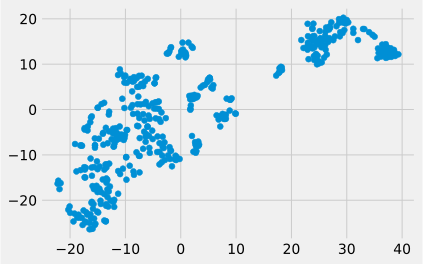

In [10]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

 ## Задание 2

#### С помощью KMeans разбиваем данные из тренировочного набора на 3 кластера, используя все признаки из датафрейма X_train.
#### max_iter=100 и random_state=42

In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = model.fit_predict(X_train_scaled)
# X_train_scaled подтягивается из Задания 1.

#### Снова строим диаграмму рассеяния на данных, полученных с помощью tsne (разноцветные кластеры).

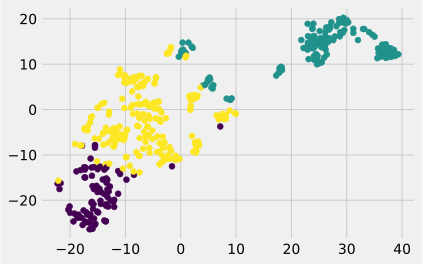

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

#### Вычисляем средние значения price и CRIM в разных кластерах.

In [13]:
print("КЛАСТЕР 1")
print("Среднее значение price:")
print(y_train[train_labels == 0].mean())
print("Среднее значение CRIM:")
print(X_train['CRIM'][train_labels == 0].mean())
print('--------------------')

print("КЛАСТЕР 2")
print("Среднее значение price:")
print(y_train[train_labels == 1].mean())
print("Среднее значение CRIM:")
print(X_train['CRIM'][train_labels == 1].mean())
print('--------------------')

print("КЛАСТЕР 3")
print("Среднее значение price:")
print(y_train[train_labels == 2].mean())
print("Среднее значение CRIM:")
print(X_train['CRIM'][train_labels == 2].mean())

КЛАСТЕР 1
Среднее значение price:
price    27.788372
dtype: float64
Среднее значение CRIM:
0.07356558139534886
--------------------
КЛАСТЕР 2
Среднее значение price:
price    16.165354
dtype: float64
Среднее значение CRIM:
10.797028425196853
--------------------
КЛАСТЕР 3
Среднее значение price:
price    24.958115
dtype: float64
Среднее значение CRIM:
0.42166020942408367
